In [1]:
#Importing Packages
import xarray as xr
import cartopy.crs as ccrs
import geopandas as gpd
import matplotlib.pyplot as plt

from src.helper_functions import grid_coords_to_2d_latlon_coords
from src.helper_functions import create_mask

In [2]:
#Loading Climate Data
base_path = '/home/jez/'
metum_path = f'{base_path}DSNE_ice_sheets/Antarctic_CORDEX/MetUM/044_3hourly/'
filename = f'Antarctic_CORDEX_MetUM_0p44deg_3-hourly_tas_{1990}.nc'
path = f'{metum_path}{filename}'

ds = xr.open_dataset(path)
da = ds.mean('time').tas
da = grid_coords_to_2d_latlon_coords(da,path)

In [3]:
#Loading Shapefile Data
antarctica_shapefile_path = f'{base_path}Bias_Correction/data/Antarctica_Shapefile/antarctica_shapefile.shp'
antarctica_gdf = gpd.read_file(antarctica_shapefile_path)

region_shapefile_path = f'{base_path}Bias_Correction/data/Ross_Region_Shapefile/ross_region.shp'
region_gdf = gpd.read_file(region_shapefile_path)

ERROR:fiona._env:PROJ: proj_identify: /home/jez/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR:fiona._env:PROJ: proj_identify: /home/jez/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


<GeoAxesSubplot: title={'center': 'height = 1.5 [m]'}, xlabel='longitude', ylabel='latitude'>

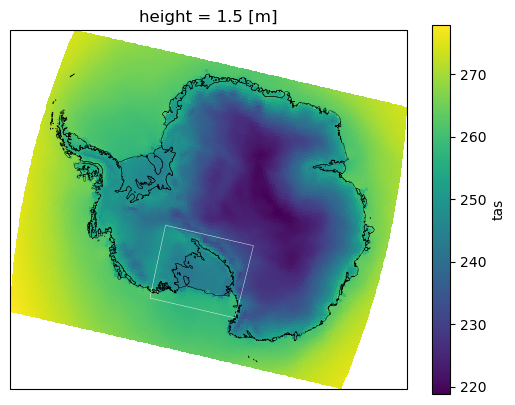

In [4]:
#Plotting Climate Data and Antarctica Shapefile and Region Shapefile
map_proj = ccrs.Orthographic(central_longitude=0.0, central_latitude=-90, globe=None)

da.plot(x='longitude',y='latitude',
    subplot_kws={"projection": map_proj},
    transform=ccrs.PlateCarree())
# plt.gca().coastlines()

antarctica_gdf.to_crs(map_proj).boundary.plot(ax=plt.gca(), color="k", linewidth=0.3)
region_gdf.to_crs(map_proj).boundary.plot(ax=plt.gca(), color="w", linewidth=0.3)

In [5]:
#Creating Mask
mask = create_mask(da,region_gdf,map_proj)
da.coords['mask'] = (('grid_latitude', 'grid_longitude'), mask)

<GeoAxesSubplot: title={'center': 'height = 1.5 [m]'}, xlabel='longitude', ylabel='latitude'>

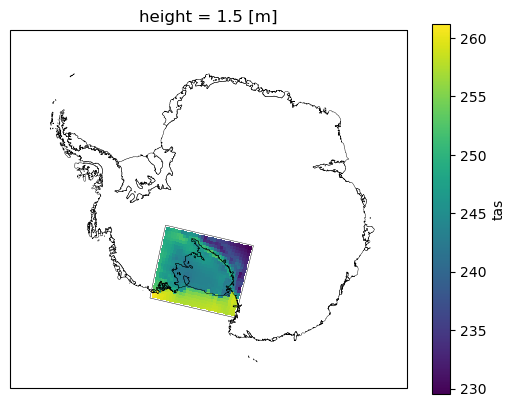

In [6]:
#Plotting Masked Climate Data and Antarctica Shapefile and Region Shapefile
map_proj = ccrs.Orthographic(central_longitude=0.0, central_latitude=-90, globe=None)

masked_da = da.where(da.mask)

masked_da.plot(x='longitude',y='latitude',
    subplot_kws={"projection": map_proj},
    transform=ccrs.PlateCarree())

antarctica_gdf.to_crs(map_proj).boundary.plot(ax=plt.gca(), color="k", linewidth=0.3)
region_gdf.to_crs(map_proj).boundary.plot(ax=plt.gca(), color="k", linewidth=0.3)